In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\dhruv\Downloads\datasets\lung.csv')

In [3]:
df.head()

,Unnamed: 0,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,90,Bronchial Asthma,Lungs,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91,Bronchial Asthma,Lungs,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,Bronchial Asthma,Lungs,fatigue,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93,Bronchial Asthma,Lungs,fatigue,cough,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,Bronchial Asthma,Lungs,fatigue,cough,high_fever,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Unnamed: 0      0
Disease         0
Type            0
Symptom_1      44
Symptom_2      44
Symptom_3      43
Symptom_4      43
Symptom_5      47
Symptom_6      91
Symptom_7     165
Symptom_8     166
Symptom_9     162
Symptom_10    163
Symptom_11    214
Symptom_12    285
Symptom_13    287
Symptom_14    289
Symptom_15    289
Symptom_16    337
Symptom_17    409
dtype: int64

In [5]:
df=df.drop(columns=['Unnamed: 0','Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],axis=1)
df.head()

,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9
0,Bronchial Asthma,Lungs,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN
1,Bronchial Asthma,Lungs,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN
2,Bronchial Asthma,Lungs,fatigue,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN
3,Bronchial Asthma,Lungs,fatigue,cough,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN
4,Bronchial Asthma,Lungs,fatigue,cough,high_fever,family_history,mucoid_sputum,NaN,NaN,NaN,NaN


In [6]:
df.fillna("None",inplace=True)
df=df.drop(columns="Type",axis =1)
d=df["Disease"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
le.fit(df.values.flatten())

LabelEncoder()

In [9]:
df=pd.DataFrame(columns=df.columns, data=le.transform(df.values.flatten()).reshape(df.shape))

In [10]:
df["Disease"]=d

In [11]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' breathlessness': 0, ' chest_pain': 1, ' chills': 2, ' cough': 3, ' family_history': 4, ' fast_heart_rate': 5, ' fatigue': 6, ' high_fever': 7, ' loss_of_appetite': 8, ' malaise': 9, ' mild_fever': 10, ' mucoid_sputum': 11, ' phlegm': 12, ' rusty_sputum': 13, ' sweating': 14, ' swelled_lymph_nodes': 15, ' vomiting': 16, ' weight_loss': 17, 'Bronchial Asthma': 18, 'No disease': 19, 'None': 20, 'Pneumonia': 21, 'Tuberculosis': 22}


In [12]:
df1=df.sample(frac=1)
df1

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9
295,Tuberculosis,2,16,6,17,3,7,0,14,8
339,Bronchial Asthma,6,3,7,0,4,11,20,20,20
340,Tuberculosis,2,16,6,17,3,7,0,14,8
113,Pneumonia,6,3,7,0,14,9,12,1,5
219,Bronchial Asthma,6,3,7,0,4,11,20,20,20
...,...,...,...,...,...,...,...,...,...,...
299,Pneumonia,2,6,3,7,0,14,9,12,1
130,Tuberculosis,2,16,6,17,3,7,0,14,8
176,Pneumonia,2,6,3,0,14,9,12,1,5
82,Pneumonia,2,6,3,7,0,14,9,12,1


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Symptom_1'),
  Text(0, 1.5, 'Symptom_2'),
  Text(0, 2.5, 'Symptom_3'),
  Text(0, 3.5, 'Symptom_4'),
  Text(0, 4.5, 'Symptom_5'),
  Text(0, 5.5, 'Symptom_6'),
  Text(0, 6.5, 'Symptom_7'),
  Text(0, 7.5, 'Symptom_8'),
  Text(0, 8.5, 'Symptom_9')])

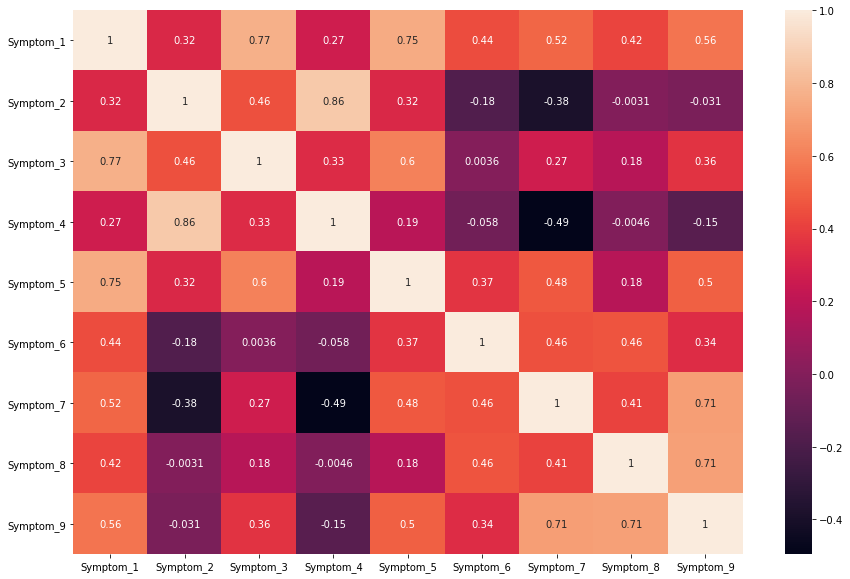

In [13]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.yticks(rotation=0)

In [14]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rf01  = RandomForestClassifier(n_estimators=200 , criterion="gini", oob_score=True)
rf01.fit(x_train, y_train)
y_pred=rf01.predict(x_test)

In [17]:
result_rf=accuracy_score(y_test,y_pred)
result_rf

1.0

In [18]:
print(confusion_matrix(y_test,y_pred))

[[38  0  0  0]
 [ 0 12  0  0]
 [ 0  0 38  0]
 [ 0  0  0 35]]


In [21]:
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_p=mod0.predict_proba(x_test)
print(y_p)

[[4.07039701e-07 9.96874065e-01 3.12531767e-03 2.10264671e-07]
 [7.46379466e-04 9.99203225e-01 5.03809230e-05 1.51005168e-08]
 [4.13324787e-04 2.48731670e-06 9.99180361e-01 4.03827101e-04]
 [3.16104442e-06 2.25367815e-05 5.80243433e-06 9.99968500e-01]
 [9.99940382e-01 1.89374994e-05 2.22375058e-05 1.84429554e-05]
 [3.58508633e-07 9.99989819e-01 3.02440137e-07 9.52026120e-06]
 [8.01296898e-06 4.23210090e-05 4.29042179e-06 9.99945376e-01]
 [6.98870611e-05 7.00146785e-07 9.99695852e-01 2.33561259e-04]
 [4.13324787e-04 2.48731670e-06 9.99180361e-01 4.03827101e-04]
 [8.01296898e-06 4.23210090e-05 4.29042179e-06 9.99945376e-01]
 [4.13324787e-04 2.48731670e-06 9.99180361e-01 4.03827101e-04]
 [5.06823374e-04 4.47159952e-05 9.98748331e-01 7.00129959e-04]
 [1.13708196e-06 9.99998198e-01 6.42281859e-07 2.28177078e-08]
 [1.04144185e-05 5.38460684e-05 1.53009659e-05 9.99920439e-01]
 [8.01296898e-06 4.23210090e-05 4.29042179e-06 9.99945376e-01]
 [3.77294244e-04 1.01472905e-04 9.98497070e-01 1.024162

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
